In [1]:
import pandas as pd
import geopandas as gpd
import sklearn
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

DROOT = os.path.join('./1-data/')
drootf = lambda path: os.path.join(DROOT, path)

In [6]:
pc_gdf = gpd.read_file('./1-data/2023-CBS_pc4_2022_v1/cbs_pc4_2022_v1.gpkg')
pc_gdf.postcode4 = pc_gdf.postcode4.astype(str)
pc_gdf['kmarea'] = pc_gdf.to_crs(pc_gdf.estimate_utm_crs()).area / 10e6 # to Km2
pc_gdf.head(2)

,postcode4,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry,kmarea
0,1184,625,320,305,100,90,110,215,110,70,10,10,10,10,255,70,70,20,95,2.4,245,165,10,-99997,10,20,10,25,-99997,20,80,20,15,10,902,15,585,4,"MULTIPOLYGON (((121294.892 478995.293, 121341....",0.121549
1,1217,7735,3790,3945,1145,990,1230,2320,2055,70,0,10,10,10,3505,1405,1040,140,920,2.1,3680,1670,495,345,360,290,295,140,80,1675,70,30,375,330,754,345,2126,2,"MULTIPOLYGON (((140209.617 470877.047, 140206....",0.743158


,postcode4,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,percentage_geb_nederland_herkomst_overig_europa,percentage_geb_nederland_herkomst_buiten_europa,percentage_geb_buiten_nederland_herkomst_europa,percentage_geb_buiten_nederland_herkmst_buiten_europa,aantal_part_huishoudens,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,gemiddelde_huishoudensgrootte,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry,kmarea
449,1769,185,95,90,25,10,25,65,55,90,-99997,-99997,-99997,-99997,80,15,45,-99997,20,2.4,80,30,5,-99997,10,5,10,-99997,10,-99997,90,-99997,-99997,5,494,5,35,5,"MULTIPOLYGON (((118791.490 532337.730, 118796....",0.400793


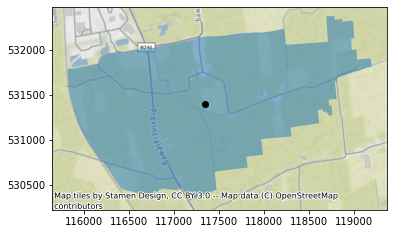

In [7]:
hh = pc_gdf[pc_gdf.postcode4 == '1769']

ax = hh.plot(alpha=0.5)
hh.centroid.plot(ax=ax, color='#000')
ctx.add_basemap(ax=ax, crs=pc_gdf.crs, zoom=14)

hh

In [8]:
pc_gdf['kmarea_bin'] = pd.cut(pc_gdf.kmarea, 20)
pc_gdf.kmarea_bin.value_counts()

(-0.0126, 0.668]    2328
(0.668, 1.336]       940
(1.336, 2.003]       400
(2.003, 2.671]       203
(2.671, 3.338]        84
(3.338, 4.005]        43
(4.005, 4.673]        26
(4.673, 5.34]         14
(5.34, 6.008]         12
(6.008, 6.675]         9
(6.675, 7.343]         4
(12.682, 13.35]        3
(8.678, 9.345]         2
(11.347, 12.015]       2
(12.015, 12.682]       0
(7.343, 8.01]          0
(8.01, 8.678]          0
(9.345, 10.013]        0
(10.013, 10.68]        0
(10.68, 11.347]        0
Name: kmarea_bin, dtype: int64